In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
%matplotlib inline

In [4]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
heart_data.shape

(303, 14)

In [8]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
heart_data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [10]:

heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
# change the categorical type to categorical variables
heart_data['sex'] = heart_data['sex'].astype('object')
heart_data['cp'] = heart_data['cp'].astype('object')
heart_data['fbs'] = heart_data['fbs'].astype('object')
heart_data['restecg'] = heart_data['restecg'].astype('object')
heart_data['exang'] = heart_data['exang'].astype('object')
heart_data['slope'] = heart_data['slope'].astype('object')
heart_data['ca'] = heart_data['ca'].astype('object')
heart_data['thal'] = heart_data['thal'].astype('object')
heart_data.dtypes
     

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [12]:
obj = (heart_data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

Categorical variables: 8


In [13]:
heart_data['ca'].unique()

array([0, 2, 1, 3, 4], dtype=object)

In [14]:
heart_data.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [15]:
heart_data[heart_data['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [16]:
heart_data.loc[heart_data['ca']==4, 'ca'] = np.NaN

In [17]:
heart_data['ca'].unique()

array([0, 2, 1, 3, nan], dtype=object)

In [18]:
heart_data.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [19]:
heart_data.loc[heart_data['thal']==0, 'thal'] = np.NaN

In [20]:
heart_data['thal'].unique()

array([1, 2, 3, nan], dtype=object)

In [21]:
heart_data = heart_data.fillna(heart_data.median())
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:

# change the labelling for better interpretation/ visualization understanding
heart_data['target'] = heart_data.target.replace({1: "Disease", 0: "No_disease"})
#heart_data['sex'] = heart_data.sex.replace({1: "Male", 0: "Female"})
#heart_data['cp'] = heart_data.cp.replace({1: "typical_angina", 
 #                         2: "atypical_angina", 
  #                        3:"non-anginal pain",
   #                       4: "asymtomatic"})
#heart_data['exang'] = heart_data.exang.replace({1: "Yes", 0: "No"})
#heart_data['slope'] = heart_data.cp.replace({1: "upsloping", 
 #                         2: "flat", 
  #                        3:"downsloping"})
#heart_data['thal'] = heart_data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [24]:
duplicated = heart_data.duplicated().sum()
if duplicated:
    print('Duplicate Rows in dataset are: {}'.format(duplicated))
else:
    print('No duplicate rows')

Duplicate Rows in dataset are: 1


In [25]:
duplicated = heart_data[heart_data.duplicated(keep=False)]
duplicated.head()
result = duplicated.drop_duplicates()
print(result)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
163   38    1   2       138   175    0        1      173      0      0.0   

     slope   ca  thal   target  
163      2  0.0   2.0  Disease  


In [26]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000


In [27]:
# define continuous variable
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(heart_data_out, drop = False):
    for each_feature in heart_data_out.columns:
        feature_data = heart_data_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            heart_data.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(heart_data[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [28]:
#outliers(heart_data[continous_features], drop=True)

In [29]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Disease       165
No_disease    138
Name: target, dtype: int64


Text(0.5, 1.0, 'Heart Disease Classes')

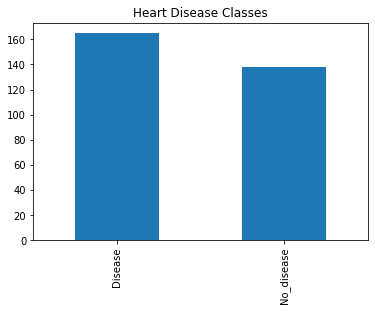

In [30]:
#1 ---> Disease
#0 ---> No Disease

print(heart_data.target.value_counts())
heart_data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

Text(0.5, 1.0, 'Age Distribution')

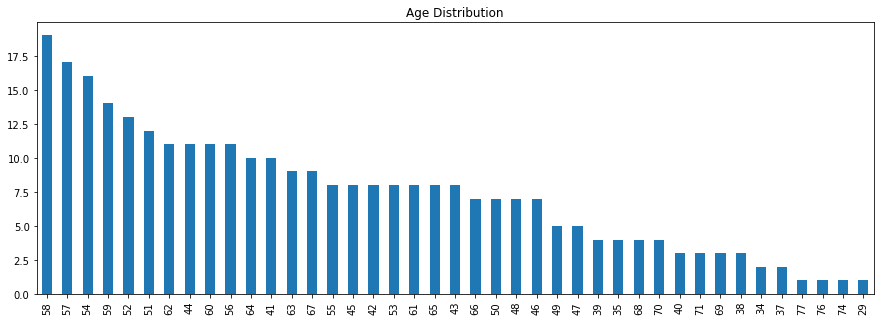

In [31]:
# print(heart_data.age.value_counts())
plt.figure(figsize=(15,5))
heart_data['age'].value_counts().plot(kind='bar').set_title('Age Distribution')

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
Name: age, dtype: int64


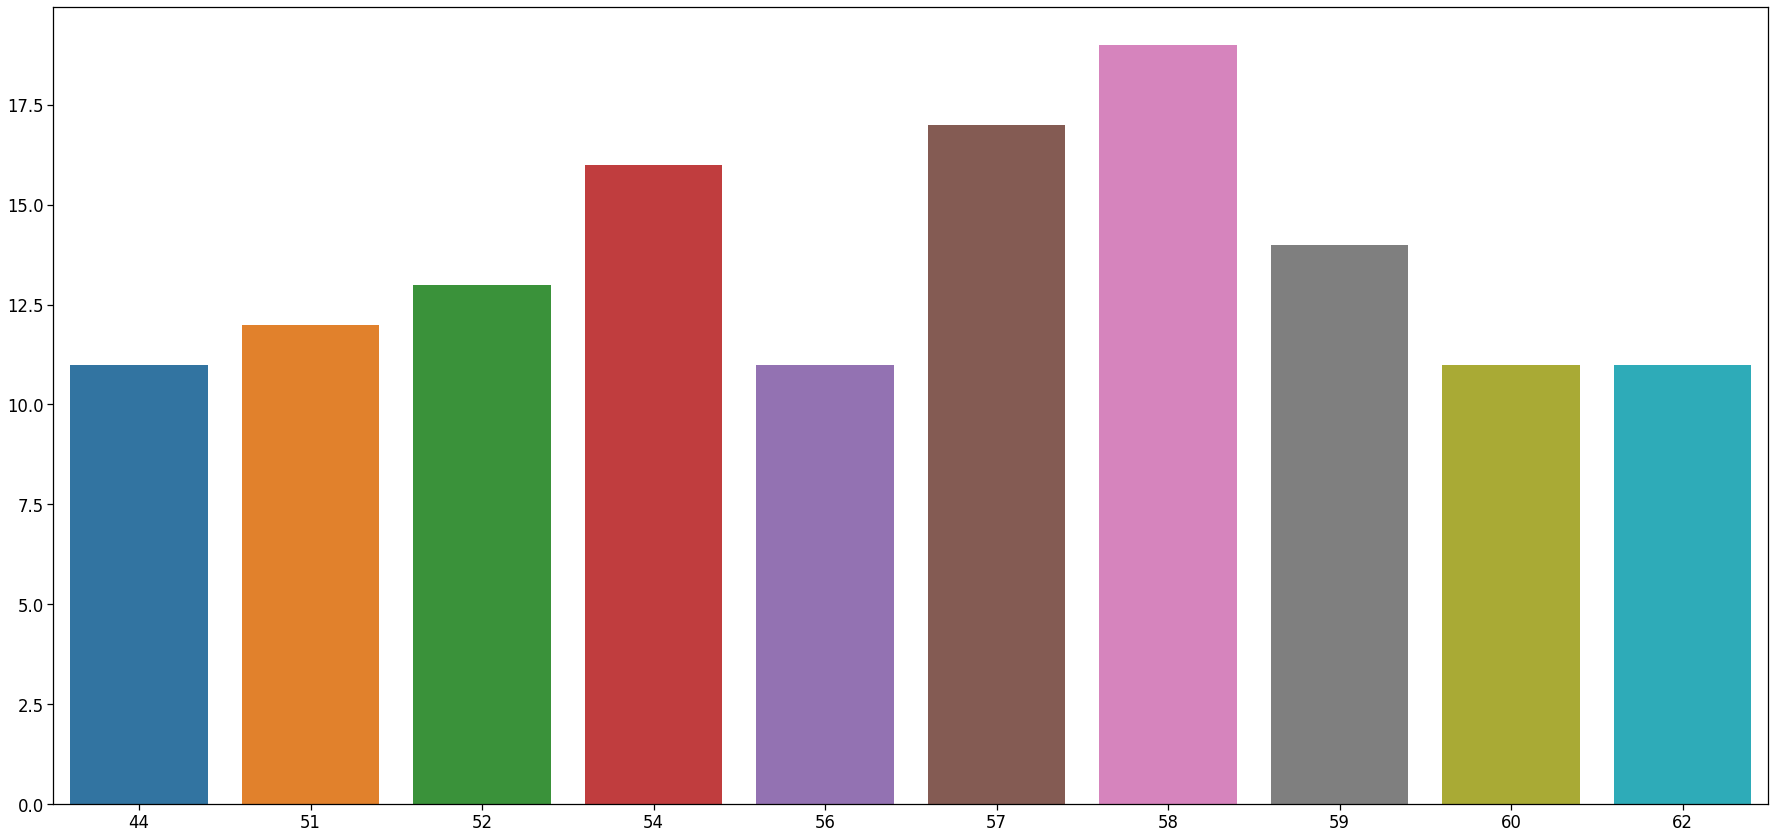

In [32]:
print(heart_data.age.value_counts()[:10])
plt.figure(figsize=(25,12))
sns.set_context('notebook',font_scale = 1.5)
sns.barplot(x=heart_data.age.value_counts()[:10].index,y=heart_data.age.value_counts()[:10].values)
plt.tight_layout()

In [33]:

# to know the youngest or oldest in age
print(min(heart_data.age))
print(max(heart_data.age))
print(heart_data.age.mean())
     

29
77
54.366336633663366


1    207
0     96
Name: sex, dtype: int64


Text(0.5, 1.0, 'sex Distribution')

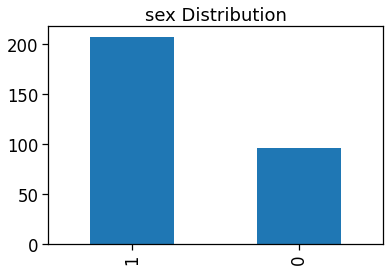

In [34]:
print(heart_data.sex.value_counts())
heart_data['sex'].value_counts().plot(kind='bar').set_title('sex Distribution')

# 1---> Male
# 0---> Female

Text(0.5, 1.0, 'Disease classes according to Sex')

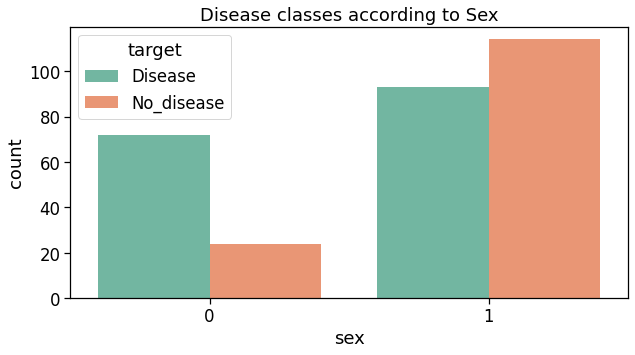

In [35]:


plt.figure(figsize=(10,5))
sns.countplot(x='sex', hue='target', data=heart_data, palette='Set2').set_title('Disease classes according to Sex')

0    143
2     87
1     50
3     23
Name: cp, dtype: int64


Text(0.5, 1.0, 'Chest Pain Distribution')

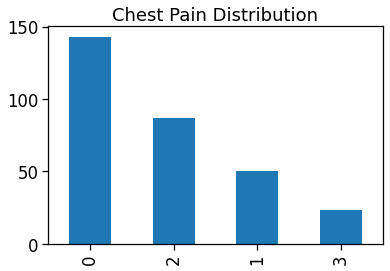

In [36]:
#0 ---> none
#1 ---> typical_angina
#2 ---> atypical_angina
#3 ---> non-anginal pain




print(heart_data.cp.value_counts())
heart_data['cp'].value_counts().plot(kind='bar').set_title('Chest Pain Distribution')

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

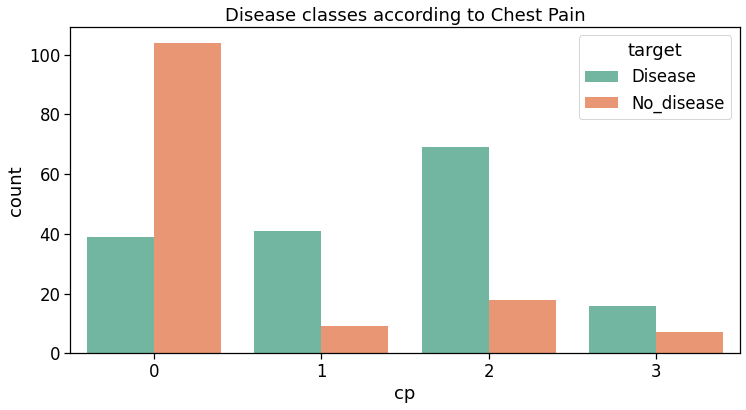

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='cp', hue='target', data=heart_data, palette='Set2').set_title('Disease classes according to Chest Pain')

1    152
0    147
2      4
Name: restecg, dtype: int64


Text(0.5, 1.0, 'Resting ECG Distribution')

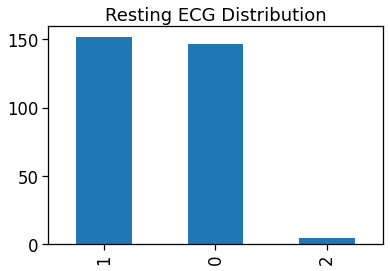

In [38]:
print(heart_data.restecg.value_counts())
heart_data['restecg'].value_counts().plot(kind='bar').set_title('Resting ECG Distribution')

0    204
1     99
Name: exang, dtype: int64


Text(0.5, 1.0, 'Exercise Induced Angina Distribution')

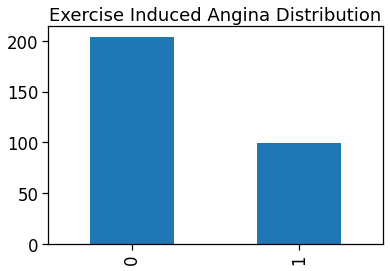

In [39]:
#0 --> No
#1 --> Yes
print(heart_data.exang.value_counts())
heart_data['exang'].value_counts().plot(kind='bar').set_title('Exercise Induced Angina Distribution')

Text(0.5, 1.0, 'Disease classes according to Exercise Induced Angina')

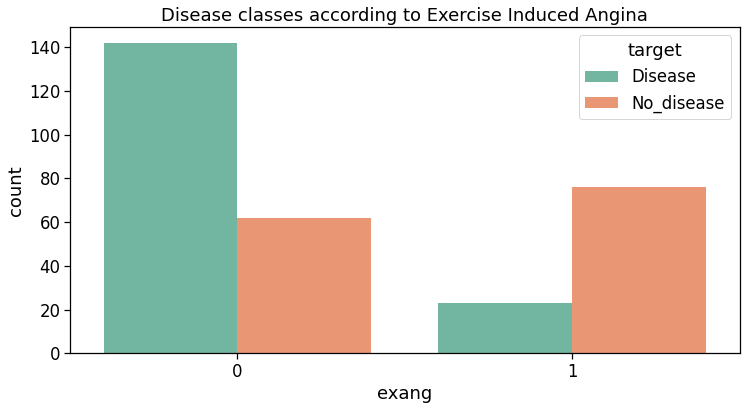

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='exang', hue='target', data=heart_data, palette='Set2').set_title('Disease classes according to Exercise Induced Angina')

0    258
1     45
Name: fbs, dtype: int64


Text(0.5, 1.0, 'Fbs Distribution')

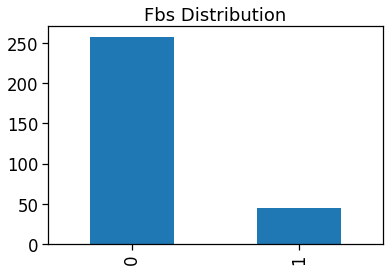

In [41]:
print(heart_data.fbs.value_counts())
heart_data['fbs'].value_counts().plot(kind='bar').set_title('Fbs Distribution')

Text(0.5, 1.0, 'Disease classes according to fbs')

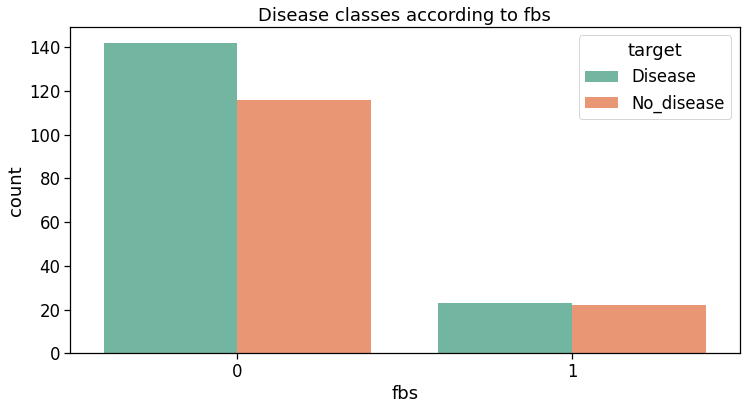

In [42]:
plt.figure(figsize=(12,6))

sns.countplot(x='fbs', hue='target', data=heart_data, palette='Set2').set_title('Disease classes according to fbs')

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64


Text(0.5, 1.0, 'Number of Major Vessel Distribution')

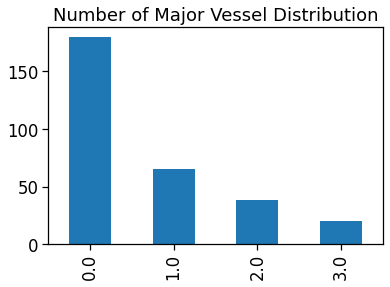

In [43]:



print(heart_data.ca.value_counts())
heart_data['ca'].value_counts().plot(kind='bar').set_title('Number of Major Vessel Distribution')

Text(0.5, 1.0, 'Disease classes according to Num Major Vessel')

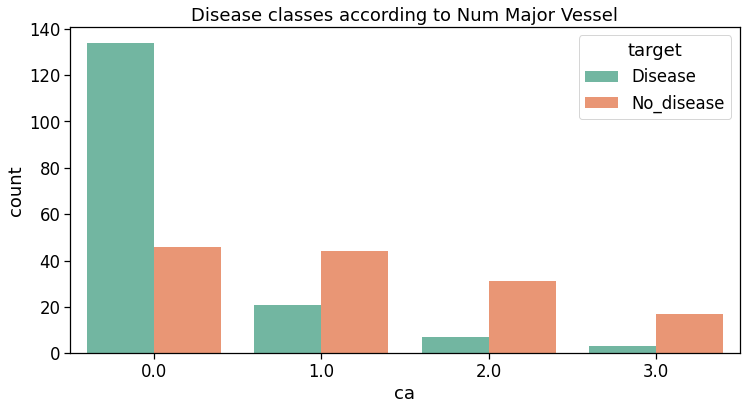

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x='ca', hue='target', data=heart_data, palette='Set2').set_title('Disease classes according to Num Major Vessel')

2.0    168
3.0    117
1.0     18
Name: thal, dtype: int64


Text(0.5, 1.0, 'thal Distribution')

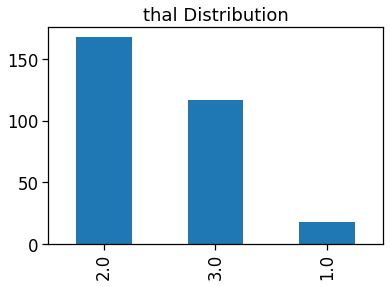

In [45]:
#0 ---> none
#1 ---> fixed effect
#2 ---> reversable effect
#3 ---> normal 

print(heart_data.thal.value_counts())
heart_data['thal'].value_counts().plot(kind='bar').set_title('thal Distribution')

Text(0.5, 1.0, 'Disease classes according to thal')

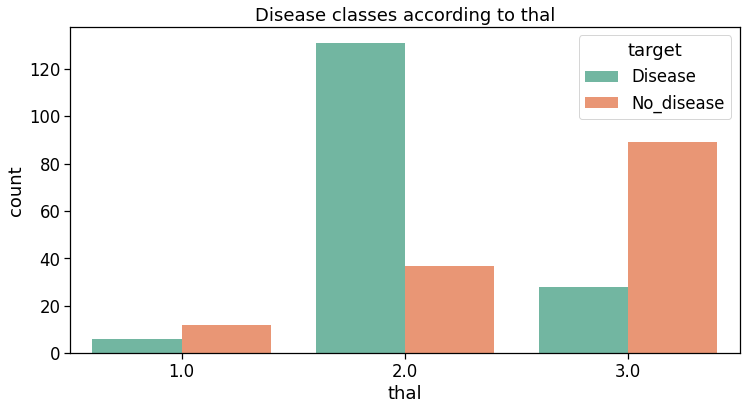

In [46]:
plt.figure(figsize=(12,6))
sns.countplot(x='thal', hue='target', data=heart_data, palette='Set2').set_title('Disease classes according to thal')

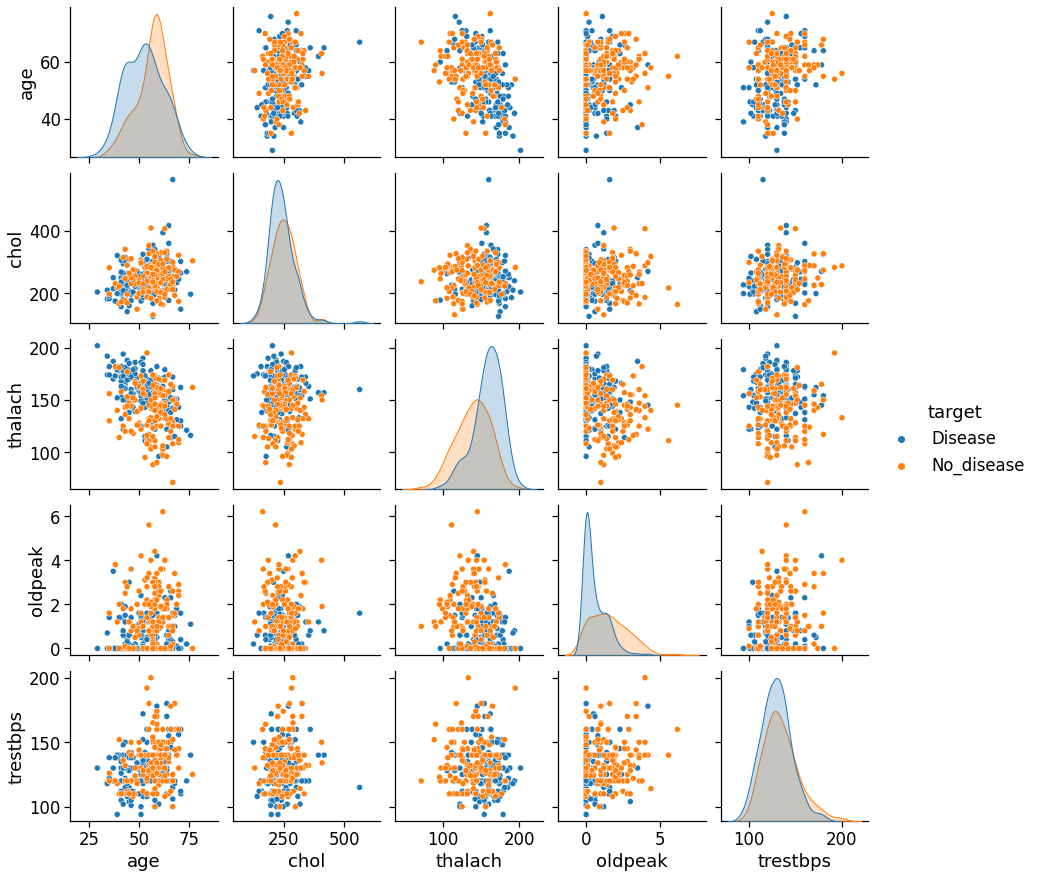

In [47]:

# define continuous variable & plot
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']  
sns.pairplot(heart_data[continous_features + ['target']], hue='target')
     

In [48]:
categorical_val = []
continous_val = []
for column in heart_data.columns:
    print("--------------------")
    print(f"{column} : {heart_data[column].unique()}")
    if len(heart_data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

--------------------
age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
--------------------
sex : [1 0]
--------------------
cp : [3 2 1 0]
--------------------
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
--------------------
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

In [49]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope   ca  thal  
0        0  0.0   1.0  
1        0  0.0   2.0  
2        2  0.0

In [50]:
print(Y)

0         Disease
1         Disease
2         Disease
3         Disease
4         Disease
          ...    
298    No_disease
299    No_disease
300    No_disease
301    No_disease
302    No_disease
Name: target, Length: 303, dtype: object


In [66]:
#stratify=Y,
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  random_state=42)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [68]:
# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
# Define models
models = [('Logistic Regression', LogisticRegression()),
          ('SVM', SVC()),
          ('KNN', KNeighborsClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ('Neural Network', MLPClassifier())]

In [1]:

# Train and evaluate models
for name, model in models:
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    prec = precision_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    auc = roc_auc_score(Y_test, y_pred)
    print(name)
    print('Accuracy: {:.2f}'.format(acc))
    print('Precision: {:.2f}'.format(prec))
    print('Recall: {:.2f}'.format(rec))
    print('F1-score: {:.2f}'.format(f1))
    print('AUC: {:.2f}'.format(auc))
    print('-'*50)

NameError: name 'models' is not defined

In [631]:
model = LogisticRegression()

In [632]:
model.fit(X_train, Y_train)

/home/khalsa/.local/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [633]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [634]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.871900826446281


In [635]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [636]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9016393442622951


In [637]:
#Predictive System


input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


['No_disease']
